## Analyze A/B Test Results


## Table of Contents
- [Introduction](#intro)
- [Part I - Probability](#probability)
- [Part II - A/B Test](#ab_test)
- [Part III - Regression](#regression)


<a id='intro'></a>
### Introduction

A/B tests are very commonly performed by data analysts and data scientists.  It is important that you get some practice working with the difficulties of these 

For this project, i will be working to understand the results of an A/B test run by an e-commerce website.  I goal is to work through this notebook to help the company understand if they should implement the new page, keep the old page, or perhaps run the experiment longer to make their decision.


<a id='probability'></a>
#### Part I - Probability

To get started, let's import our libraries.

In [1]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline
# We are setting the seed to assure you get the same answers on quizzes as we set up
random.seed(42)

`1.` Now, read in the `ab_data.csv` data. Store it in `df`.  **Use your dataframe to answer the questions in Quiz 1 of the classroom.**

a. Read in the dataset and take a look at the top few rows here:

In [110]:
df = pd.read_csv('ab_data.csv')
df.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


b. Use the cell below to find the number of rows in the dataset.

In [111]:
df.shape # checking total rows and columns in the dataset

(294478, 5)

c. The number of unique users in the dataset.

In [112]:
users = df.user_id.nunique()
users # keeping unique users in a variable

290584

d. The proportion of users converted.

In [113]:
df.loc[df['converted'] == 1]['converted'].count() / users # proportion of users who converted

0.12126269856564711

e. The number of times the `new_page` and `treatment` don't match.

In [114]:
df.query('(group == "treatment" and landing_page != "new_page") or (group != "treatment" and landing_page == "new_page")')['user_id'].count()
# counting the number of users who are in the treatment group and have not visited the new page

3893

f. Do any of the rows have missing values?

In [115]:
df.info()
# there are no rows with null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294478 entries, 0 to 294477
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   user_id       294478 non-null  int64 
 1   timestamp     294478 non-null  object
 2   group         294478 non-null  object
 3   landing_page  294478 non-null  object
 4   converted     294478 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 11.2+ MB


`2.` For the rows where **treatment** does not match with **new_page** or **control** does not match with **old_page**, we cannot be sure if this row truly received the new or old page.  Use **Quiz 2** in the classroom to figure out how we should handle these rows.  

a. Now use the answer to the quiz to create a new dataset that meets the specifications from the quiz.  Store your new dataframe in **df2**.

In [116]:
df2 = df.drop(df.query('(group == "treatment" and landing_page != "new_page") or (group != "treatment" and landing_page == "new_page") or (group == "control" and landing_page != "old_page") or (group != "control" and landing_page == "old_page")').index)
# removing lines that do not match the treatment and control users

In [117]:
# Double Check all of the correct rows were removed - this should be 0
df2[((df2['group'] == 'treatment') == (df2['landing_page'] == 'new_page')) == False].shape[0]

0

`3.` Use **df2** and the cells below to answer questions for **Quiz3** in the classroom.

a. How many unique **user_id**s are in **df2**?

In [118]:
df2.user_id.nunique()

290584

b. There is one **user_id** repeated in **df2**.  What is it?

In [119]:
df2[df2.duplicated(['user_id'], keep=False)].user_id # checked records with repeated users

1899    773192
2893    773192
Name: user_id, dtype: int64

c. What is the row information for the repeat **user_id**? 

In [120]:
df2.loc[df2['user_id'] == 773192]
# means that the user entered on a different day and time

,user_id,timestamp,group,landing_page,converted
1899,773192,2017-01-09 05:37:58.781806,treatment,new_page,0
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


d. Remove **one** of the rows with a duplicate **user_id**, but keep your dataframe as **df2**.

In [121]:
df2 = df2.drop(df2[(df2.user_id == 773192) & (df2['timestamp'] == '2017-01-14 02:55:59.590927')].index)
df2[df2['user_id'] == 773192]

,user_id,timestamp,group,landing_page,converted
1899,773192,2017-01-09 05:37:58.781806,treatment,new_page,0


`4.` Use **df2** in the cells below to answer the quiz questions related to **Quiz 4** in the classroom.

a. What is the probability of an individual converting regardless of the page they receive?

In [122]:
users = df2.query('converted == 1').user_id.nunique()
users / df2.user_id.shape[0]

0.11959708724499628

b. Given that an individual was in the `control` group, what is the probability they converted?

In [123]:
control_one = df2.query('group == "control" & converted == 1').user_id.nunique()
control_two = df2.query('group == "control"').user_id.nunique()
control_prob = control_one / control_two
control_prob

0.1203863045004612

c. Given that an individual was in the `treatment` group, what is the probability they converted?

In [124]:
treatment_one = df2.query('group == "treatment" & converted == 1').user_id.nunique()
treatment_two = df2.query('group == "treatment"').user_id.nunique()
treatment_prob = treatment_one / treatment_two
treatment_prob

0.11880806551510564

d. What is the probability that an individual received the new page?

In [125]:
landing_page_one = df2.query('landing_page == "new_page"').user_id.nunique()
landing_page_one / df2.user_id.shape[0]

0.5000619442226688

e. Consider your results from parts (a) through (d) above, and explain below whether you think there is sufficient evidence to conclude that the new treatment page leads to more conversions.

**The total number of users who converted in relation to the total experiment was 11.9%.
The difference between the converting control group compared to the converting treatment group is very small, 12.1% and 11.9% respectively.
The total number of users who converted to the new page was 50.01%. There is no statistically significant difference in conversion between the new page and the old page.**

<a id='ab_test'></a>
### Part II - A/B Test

Notice that because of the time stamp associated with each event, you could technically run a hypothesis test continuously as each observation was observed.  

However, then the hard question is do you stop as soon as one page is considered significantly better than another or does it need to happen consistently for a certain amount of time?  How long do you run to render a decision that neither page is better than another?  

These questions are the difficult parts associated with A/B tests in general.  


`1.` For now, consider you need to make the decision just based on all the data provided.  If you want to assume that the old page is better unless the new page proves to be definitely better at a Type I error rate of 5%, what should your null and alternative hypotheses be?  You can state your hypothesis in terms of words or in terms of **$p_{old}$** and **$p_{new}$**, which are the converted rates for the old and new pages.

**null hypothese = Pnew - Pold < = 0 | 
  alternative hypothese = Pnew - Pold > 0**

`2.` Assume under the null hypothesis, $p_{new}$ and $p_{old}$ both have "true" success rates equal to the **converted** success rate regardless of page - that is $p_{new}$ and $p_{old}$ are equal. Furthermore, assume they are equal to the **converted** rate in **ab_data.csv** regardless of the page. <br><br>

Use a sample size for each page equal to the ones in **ab_data.csv**.  <br><br>

Perform the sampling distribution for the difference in **converted** between the two pages over 10,000 iterations of calculating an estimate from the null.  <br><br>

Use the cells below to provide the necessary parts of this simulation.  If this doesn't make complete sense right now, don't worry - you are going to work through the problems below to complete this problem.  You can use **Quiz 5** in the classroom to make sure you are on the right track.<br><br>

a. What is the **conversion rate** for $p_{new}$ under the null? 

In [126]:
p_new = (df2.query('converted == 1')['user_id'].nunique())/df2['user_id'].nunique()
p_new

0.11959708724499628

b. What is the **conversion rate** for $p_{old}$ under the null? <br><br>

In [127]:
p_old = (df2.query('converted == 1')['user_id'].nunique())/df2['user_id'].nunique()
p_old

0.11959708724499628

c. What is $n_{new}$, the number of individuals in the treatment group?

In [128]:
n_treatment = df2.query('group == "treatment"').user_id.nunique()
n_treatment

145310

d. What is $n_{old}$, the number of individuals in the control group?

In [129]:
n_control = df2.query('group == "control"').user_id.nunique()
n_control

145274

e. Simulate $n_{new}$ transactions with a conversion rate of $p_{new}$ under the null.  Store these $n_{new}$ 1's and 0's in **new_page_converted**.

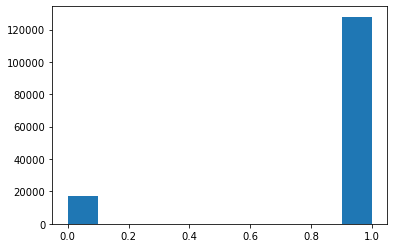

In [130]:
import matplotlib.pyplot as plt
%matplotlib inline

new_page_converted = np.random.choice([0,1], n_treatment, p=(p_new,1-p_new))
plt.hist(new_page_converted)
plt.show()

f. Simulate $n_{old}$ transactions with a conversion rate of $p_{old}$ under the null.  Store these $n_{old}$ 1's and 0's in **old_page_converted**.

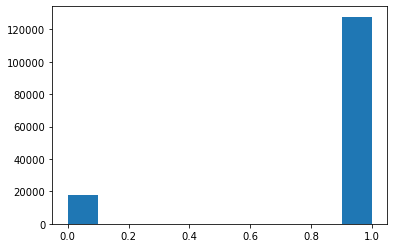

In [131]:
old_page_converted = np.random.choice([0,1], n_control, p=(p_old,1-p_old))
plt.hist(old_page_converted)
plt.show()

g. Find $p_{new}$ - $p_{old}$ for your simulated values from part (e) and (f).

In [138]:
new_page_converted.mean()

0.8802422407267222

In [139]:
old_page_converted.mean()

0.8794966752481518

In [140]:
new_page_converted.mean() - old_page_converted.mean()

0.0007455654785704091

h. Create 10,000 $p_{new}$ - $p_{old}$ values using the same simulation process you used in parts (a) through (g) above. Store all 10,000 values in a NumPy array called **p_diffs**.

In [141]:
# declaring the variable related to the new page, and generating 10,000 samples
new_converted_simulation = np.random.binomial(n_treatment, p_new, 10000)/n_treatment
# declaring the variable related to the old page, and generating 10,000 samples
old_converted_simulation = np.random.binomial(n_control, p_old, 10000)/n_control
# extracting the difference from the samples and saving to an array
p_diffs = new_converted_simulation - old_converted_simulation
p_diffs

array([ 0.00019061,  0.0013675 , -0.00031168, ..., -0.00016744,
        0.00029392, -0.00011892])

i. Plot a histogram of the **p_diffs**.  Does this plot look like what you expected?  Use the matching problem in the classroom to assure you fully understand what was computed here.

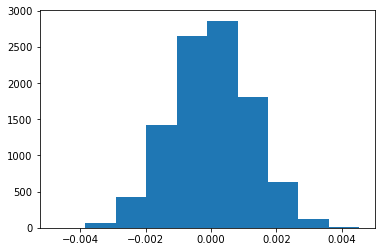

In [143]:
plt.hist(p_diffs); # The graph accurately represents the difference in average
# conversions between the old and new pages

In [144]:
new = df2.query('converted == 1 and landing_page == "new_page"').user_id.nunique()
old = df2.query('converted == 1 and landing_page == "old_page"').user_id.nunique()

In [145]:
new_one = new / n_treatment 
old_one = old / n_control

In [146]:
diffs = new_one - old_one
diffs

-0.0015782389853555567

j. What proportion of the **p_diffs** are greater than the actual difference observed in **ab_data.csv**?

In [149]:
(p_diffs > diffs).mean()

0.9078

k. Please explain using the vocabulary you've learned in this course what you just computed in part **j.**  What is this value called in scientific studies?  What does this value mean in terms of whether or not there is a difference between the new and old pages?

**The Pold is greater than Pnew, so we fail to reject the null hypothesis, with an error rate of 0,05. According to the data, the old page is more likely to convert more than the new page.
The p-value is the probability of obtaining a test statistic equal to or more extreme than that observed on the null hypothesis.**

l. We could also use a built-in to achieve similar results.  Though using the built-in might be easier to code, the above portions are a walkthrough of the ideas that are critical to correctly thinking about statistical significance. Fill in the below to calculate the number of conversions for each page, as well as the number of individuals who received each page. Let `n_old` and `n_new` refer the the number of rows associated with the old page and new pages, respectively.

In [150]:
import statsmodels.api as sm
import numpy as np

print(old)
print(new)
print(n_control)
print(n_treatment)

17489
17264
145274
145310


m. Now use `stats.proportions_ztest` to compute your test statistic and p-value.  [Here](https://docs.w3cub.com/statsmodels/generated/statsmodels.stats.proportion.proportions_ztest/) is a helpful link on using the built in.

In [151]:
z_score, p_value = sm.stats.proportions_ztest(np.array([old, new]),
                                              np.array([n_control, n_treatment]), alternative='smaller')
# https://www.statsmodels.org/stable/generated/statsmodels.stats.proportion.proportions_ztest.html
# in this function I can extract the z score and the p value,
# I compute the results above into an array as the function requires.

In [152]:
print(z_score)
print(p_value)
# showing the results of the function

1.3109241984234394
0.9050583127590245


n. What do the z-score and p-value you computed in the previous question mean for the conversion rates of the old and new pages?  Do they agree with the findings in parts **j.** and **k.**?

**In general, the z score, in the range of -1.96 and 1.96, are considered common and statistically not significant. In our analysis, our z score of 1.31 leads us to believe that we have failed to reject the null hypothesis. As well as our p value of 0.09%, our acceptable error rate is up to 0.05%. Therefore, it means that new pages do not lead to better results than old pages.**

<a id='regression'></a>
### Part III - A regression approach

`1.` In this final part, you will see that the result you achieved in the A/B test in Part II above can also be achieved by performing regression.<br><br> 

a. Since each row is either a conversion or no conversion, what type of regression should you be performing in this case?

**The best regression technique to solve the proposed problem is logistic regression, as it works with categorical data.**

b. The goal is to use **statsmodels** to fit the regression model you specified in part **a.** to see if there is a significant difference in conversion based on which page a customer receives. However, you first need to create in df2 a column for the intercept, and create a dummy variable column for which page each user received.  Add an **intercept** column, as well as an **ab_page** column, which is 1 when an individual receives the **treatment** and 0 if **control**.

In [153]:
df2['intercept'] = 1 # creating the intercept column
df2.head()

,user_id,timestamp,group,landing_page,converted,intercept
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,1
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,1


In [154]:
df2 = df2.join(pd.get_dummies(df2['landing_page']))
df2.head()

,user_id,timestamp,group,landing_page,converted,intercept,new_page,old_page
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1,0,1
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,1,0,1
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,1,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,1,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,1,0,1


In [155]:
df2['ab_page'] = pd.get_dummies(df2['group'])['treatment']
# creating the column 'ab_page' with the function get_dummies, where 'control' is equal to 0
# and 'tratment' is equal to 1
df2.head()

,user_id,timestamp,group,landing_page,converted,intercept,new_page,old_page,ab_page
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1,0,1,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,1,0,1,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,1,0,1
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,1,0,1
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,1,0,1,0


c. Use **statsmodels** to instantiate your regression model on the two columns you created in part b., then fit the model using the two columns you created in part **b.** to predict whether or not an individual converts. 

In [156]:
import statsmodels.api as sm

logit_mod = sm.Logit(df2['converted'], df2[['intercept', 'ab_page']])
# creating the logistic regression model with the dependent variable 'converted' and the independent
# variable 'ab_page', with the Logit function of the statsmodel library
results = logit_mod.fit()

Optimization terminated successfully.
         Current function value: 0.366118
         Iterations 6


d. Provide the summary of your model below, and use it as necessary to answer the following questions.

In [157]:
results.summary2() 

<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
==================================================================
Model:              Logit            Pseudo R-squared: 0.000      
Dependent Variable: converted        AIC:              212780.3502
Date:               2021-02-02 11:25 BIC:              212801.5095
No. Observations:   290584           Log-Likelihood:   -1.0639e+05
Df Model:           1                LL-Null:          -1.0639e+05
Df Residuals:       290582           LLR p-value:      0.18988    
Converged:          1.0000           Scale:            1.0000     
No. Iterations:     6.0000                                        
-------------------------------------------------------------------
              Coef.   Std.Err.      z      P>|z|    [0.025   0.975]
-------------------------------------------------------------------
intercept    -1.9888    0.0081  -246.6690  0.0000  -2.0046  -1.9730
ab_page      -0.0150    0.0114    -1.3109  0.1899  -0.0374   0.0074
==================================================================

"""

e. What is the p-value associated with **ab_page**? Why does it differ from the value you found in **Part II**?<br><br>  **Hint**: What are the null and alternative hypotheses associated with your regression model, and how do they compare to the null and alternative hypotheses in **Part II**?

**The p value of ab_page is 0.19**

**Whether p <= 0.05 (error rate) or p> 0.05 (error rate) in this example, this tells us that it is not possible to conclude that there is a statistically significant association in the model. What explains the different p-value of part II is that the techniques differ because they have different explanatory variables.**

f. Now, you are considering other things that might influence whether or not an individual converts.  Discuss why it is a good idea to consider other factors to add into your regression model.  Are there any disadvantages to adding additional terms into your regression model?

**In view of the result of the current model, there are some disadvantages of including more terms, because the analysis will become more complex and needing to add higher order terms. I would add the variable 'timestamp' to predict better conversion times and times.**

g. Now along with testing if the conversion rate changes for different pages, also add an effect based on which country a user lives in. You will need to read in the **countries.csv** dataset and merge together your datasets on the appropriate rows.  [Here](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.join.html) are the docs for joining tables. 

Does it appear that country had an impact on conversion?  Don't forget to create dummy variables for these country columns - **Hint: You will need two columns for the three dummy variables.** Provide the statistical output as well as a written response to answer this question.

In [158]:
country = pd.read_csv('countries.csv')
country.head() # reading the data set

,user_id,country
0,834778,UK
1,928468,US
2,822059,UK
3,711597,UK
4,710616,UK


In [159]:
df2 = df2.merge(country, on='user_id')
# joining the 'ab_data' and 'countries' datasets, with the merge function
df2.head()

,user_id,timestamp,group,landing_page,converted,intercept,new_page,old_page,ab_page,country
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1,0,1,0,US
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,1,0,1,0,US
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,1,0,1,US
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,1,0,1,US
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,1,0,1,0,US


In [160]:
df2['intercept'] = 1 # creating the intercept variable
df2.head()

,user_id,timestamp,group,landing_page,converted,intercept,new_page,old_page,ab_page,country
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1,0,1,0,US
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,1,0,1,0,US
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,1,0,1,US
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,1,0,1,US
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,1,0,1,0,US


In [161]:
df2['country'].unique() # checking which countries are in the data set

array(['US', 'CA', 'UK'], dtype=object)

In [162]:
df2[['US', 'CA', 'UK']] = pd.get_dummies(df2['country'])
df2.head() 

,user_id,timestamp,group,landing_page,converted,intercept,new_page,old_page,ab_page,country,US,CA,UK
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1,0,1,0,US,0,0,1
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,1,0,1,0,US,0,0,1
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,1,0,1,US,0,0,1
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,1,0,1,US,0,0,1
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,1,0,1,0,US,0,0,1


In [163]:
df2['country'].value_counts()

US    203619
UK     72466
CA     14499
Name: country, dtype: int64

In [164]:
df2 = df2.drop(columns=['CA']) # the variables CA and old_page wiht baseline
df2.head()

,user_id,timestamp,group,landing_page,converted,intercept,new_page,old_page,ab_page,country,US,UK
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1,0,1,0,US,0,1
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,1,0,1,0,US,0,1
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,1,0,1,US,0,1
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,1,0,1,US,0,1
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,1,0,1,0,US,0,1


In [165]:
import statsmodels.api as sm

logit_mod_c = sm.Logit(df2['converted'], df2[['intercept', 'new_page', 'US', 'UK']])
# creating the logistic regression model with the dependent variable 'converted' and the independent
# variable 'new_page'', 'US', 'UK', with the Logit function of the statsmodel library
results_c = logit_mod_c.fit()

Optimization terminated successfully.
         Current function value: 0.366113
         Iterations 6


In [166]:
results_c.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
==================================================================
Model:              Logit            Pseudo R-squared: 0.000      
Dependent Variable: converted        AIC:              212781.1253
Date:               2021-02-02 11:25 BIC:              212823.4439
No. Observations:   290584           Log-Likelihood:   -1.0639e+05
Df Model:           3                LL-Null:          -1.0639e+05
Df Residuals:       290580           LLR p-value:      0.17599    
Converged:          1.0000           Scale:            1.0000     
No. Iterations:     6.0000                                        
-------------------------------------------------------------------
              Coef.   Std.Err.      z      P>|z|    [0.025   0.975]
-------------------------------------------------------------------
intercept    -1.9794    0.0127  -155.4145  0.0000  -2.0044  -1.9544
new_page     -0.0149    0.0114    -1.3069  0.1912  -0.0374   0.0075
US           -0.0506    0.0284    -1.7835  0.0745  -0.1063   0.0050
UK           -0.0099    0.0133    -0.7433  0.4573  -0.0359   0.0162
==================================================================

"""

In [167]:
np.exp(-0.0149), np.exp(-0.0506), np.exp(-0.0099)

(0.9852104557227469, 0.9506588580330708, 0.9901488436829572)

In [168]:
1/np.exp(-0.0149), 1/np.exp(-0.0506), 1/np.exp(-0.0099)

(1.0150115583846535, 1.0519020483004984, 1.009949167117542)

**Interpreting the coefficients:**

**For each new_page decrement, conversion is 1.01 more likely if everything else is constant.**
**For each decrease in US, conversion is 1.05 more likely if everything else is constant.**
**For each decrease in UK, conversion is 1.00 more likely if everything else is constant.**

h. Though you have now looked at the individual factors of country and page on conversion, we would now like to look at an interaction between page and country to see if there significant effects on conversion.  Create the necessary additional columns, and fit the new model.  

Provide the summary results, and your conclusions based on the results.

In [169]:
df2['uk_new'] = df2['new_page'] * df2['UK']
df2['us_new'] = df2['new_page'] * df2['US']
df2.head()

,user_id,timestamp,group,landing_page,converted,intercept,new_page,old_page,ab_page,country,US,UK,uk_new,us_new
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1,0,1,0,US,0,1,0,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,1,0,1,0,US,0,1,0,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,1,0,1,US,0,1,1,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,1,0,1,US,0,1,1,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,1,0,1,0,US,0,1,0,0


In [170]:
import statsmodels.api as sm

logit_mod_c = sm.Logit(df2['converted'], df2[['intercept', 'new_page', 'US', 'UK', 'uk_new', 'us_new']])
# creating the logistic regression model with the dependent variable 'converted' and the independent
# variable 'new_page'', 'US', 'UK', with the Logit function of the statsmodel library
# the variables CA and old_page wiht baseline
results_c = logit_mod_c.fit()

Optimization terminated successfully.
         Current function value: 0.366109
         Iterations 6


In [171]:
results_c.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
==================================================================
Model:              Logit            Pseudo R-squared: 0.000      
Dependent Variable: converted        AIC:              212782.6602
Date:               2021-02-02 11:26 BIC:              212846.1381
No. Observations:   290584           Log-Likelihood:   -1.0639e+05
Df Model:           5                LL-Null:          -1.0639e+05
Df Residuals:       290578           LLR p-value:      0.19199    
Converged:          1.0000           Scale:            1.0000     
No. Iterations:     6.0000                                        
-------------------------------------------------------------------
              Coef.   Std.Err.      z      P>|z|    [0.025   0.975]
-------------------------------------------------------------------
intercept    -1.9922    0.0161  -123.4571  0.0000  -2.0238  -1.9606
new_page      0.0108    0.0228     0.4749  0.6349  -0.0339   0.0555
US           -0.0118    0.0398    -0.2957  0.7674  -0.0899   0.0663
UK            0.0057    0.0188     0.3057  0.7598  -0.0311   0.0426
uk_new       -0.0314    0.0266    -1.1807  0.2377  -0.0835   0.0207
us_new       -0.0783    0.0568    -1.3783  0.1681  -0.1896   0.0330
==================================================================

"""

In [172]:
np.exp(0.0108), np.exp(-0.0118), np.exp(0.0057), np.exp(-0.0314), np.exp(-0.0783)

(1.010858530520097,
 0.9882693469672547,
 1.0057162759095335,
 0.9690878603945013,
 0.9246869788348134)

In [173]:
1/np.exp(-0.0118), 1/np.exp(-0.0314), 1/np.exp(-0.0783)

(1.011869894648401, 1.0318981806179213, 1.0814470441230692)

**Interpreting the coefficients:**

**For each new_page increment, conversion is 1.01 more likely if everything else is constant.**
**For each decrease in US, conversion is 1.05 more likely if everything else is constant.**
**For each increment in UK, conversion is 1.00 more likely if everything else is constant.**
**For each decrease in uk_new, conversion is 1.03 more likely if everything else is constant.**
**For each decrease in us_new, conversion is 1.08 more likely if everything else is constant.**

**It is worth mentioning that the new_page coefficient has improved with the inclusion of new variables.**

**The p-values, with the exception of the intercept, are above the error rate of 0.05, which is not statistically significant.**